University of Michigan - ROB 101 Computational Linear Algebra

# Homework 4: Building Your Own Functions for Solving Equations 

### See our Canvas Page for the Due Date and Time!

### Pro-Tips (1) Hit save regularly (control s on a Window's machine) while working on this notebook; (2) We only grade your last submission. It does not hurt to hit the submit button multiple times while working on this notebook. If you forget to submit your work, we will not be able to grade it. 

#### Purpose:
   Up to now, we have been writing "scripts", that is, a series of commands that allow us to accomplish a goal. Scripts are a great tool and a super quick way to prototype ideas. We are now going to move on to writing "functions", which allow us to call our operations in a much easier manner. 

   Another thing we'll do is some error checking. Once you have hidden your code behind a function, someone else might try to use it in a manner that will throw bugs or much worse, produce erroneous results without throwing a bug and hence without warning the user. The funny part is, that "user" is often us! We build a function and then we forget exactly all of the special requirements on the data that the function uses to produce an answer! 
- Skills:
     - Writing functions
     - Using functions
     - Building in error checks
- Knowledge:
    - Learn to read error messages for detail
    - Confidence built in writing functions
   
#### Task:  
Read and execute the examples provided, then fill in code as directed to build your own functions, and then use them.

### Example: Forward Substitution

In [ ]:
#computes the solution x to a system Lx = b where L is a lower triangular matrix and b is a column vector
#note the structure we have used: we begin by declaring "function" and we end by declaring "end". On 
# the line before "end", we specify that value or values we are going to "return".
# Everything in between is operating on the data passed to the function.

function forwardsub(L, b)
    # START of our computations
    n = length(b)
    x = Vector{Float64}(undef, n); #initialize an x vector of the correct size
    x[1] = b[1]/L[1,1] #find the first entry of x
    for i = 2:n #find every entry from the 2nd to the end
        x[i]=(b[i]- (L[i,1:i-1])'*x[1:i-1] )/L[i,i] 
        #notice that we used the transpose operator to get the row of L
    end
    # END of our computations.  
    @assert !any(isinf.(x)) # Checking that x does not contain infinity
    return x
end
#Everything between the function header and this last "end" statement
#is essentailly the same as a script. It's that easy to build a function!

In [ ]:
#Here is an example where the function works!
L = [1 0 0 ; 2 1 0; 4 5 1]
b = [1; 8; 32]
forwardsub(L, b)

In [ ]:
#Here is one way that we can break our function:
L = [1 0 0 ; 2 1 0; 8 5 0]
b = [3; 2; 3]
forwardsub(L, b)

# To better understand the error messages below, please review Chapter 0.5.4 in the Lab Manual.
# The first error message of the form In[cell number]:16 will be pointing you
# to line mumber 16 of function forwardsub(L, b) where an error occured

# The second error message of the form In[cell number]:4 will be pointing you to the line in 
# this cell where the error occurred...confirming that something went wrong in forwardsub

# The reason we have not filled in values for [cell number] as they point to the  
# number of a cell, and if you run that cell many times, it keeps changing, so we
# cannot predict the number you will see. 

# See Chapter 0.5.4 in the Lab Manual.

## Problem 1


### a) Run the cell above, then choose the best explanation for why the error occurred (1 point)

**Hint:** It may help to display the matrix L and walk through the steps of the function

### Provide your answer by uncommenting one of the following lines.

To "uncomment" a line, just delete the # character in the front of the line.  This will change that line from a comment to actual, executable code.


In [ ]:
# DO NOT CHANGE the variable name or you will fail the autograder, which is looking at Ans1

# Ans1 = 1 #The for loop ran too many times, causing the code to explode
# Ans1 = 2 #The matrix L has a zero on the diagonal, leading to a divide by zero,
           #and our code did not check for that
# Ans1 = 3 #The assertion command is detecting the error, and if it were not there,
           # the function would work just fine! 


In [ ]:
#Here is another way that it could break:
L = [5 0 0 ; 1 4 0; 7 3 2]
b = [3; 2; 3; 4]
forwardsub(L, b)

### b) Run the cell above and explain why the error occurred (1 point)
Hint: Write the system of equations in regular (non-matrix) notation. We will do the first equation for you:

$$5x_1 + 0x_2 + 0x_3 = 3$$ 

### Provide your answer by uncommenting one of the following lines.

To "uncomment" a line, just delete the # character in the front of the line.  This will change that line from a comment to actual, executable code.


In [ ]:
# DO NOT CHANGE the variable name or you will fail the autograder, which is looking at Ans2

# Ans2 = 1 #The for loop ran an incorrect number of times, 
           #because b and L are not size compatible
# Ans2 = 2 #The for loop ran too few times, because length(b) is less than
           #the number of columns of L
# Ans2 = 3 #The matrix L has too many zeros above its diagonal 


In [ ]:
#The above cases produced errors, so we knew to look for a problem in the data. 
#This example will not produce an error, but it also doesn't produce the solution we expect
using Random 
Random.seed!(4321) 
L=rand(3,3) 
b=rand(3,1) 
xSol=forwardsub(L, b)
println("Oops!")
solutionError=L*xSol-b # should be a vector of ALL ZEROS if xSol solves Lx = b

### c) Run the cell above and explain why x does not satisfy Lx = b (1 point)
Hint:  You may want to add additional print statements in order to see the matrices you are using.


### Provide your answer by uncommenting one of the following lines.

To "uncomment" a line, just delete the # character in the front of the line.  This will change that line from a comment to actual, executable code.

In [ ]:
# DO NOT CHANGE the variable name or you will fail the autograder, which is looking at Ans3

# Ans3 = 1 #The function forwardsub(L, b) has a faulty return statement
# Ans3 = 2 #The function forwardsub(L, b) assumes L is lower triangular, but it is square
# Ans3 = 3 #The function forwardsub(L, b) assumes L and b have compatible sizes, but they do not


### Error Checking:  An example
Above, you experienced three possible ways that the function forwardsub(L, b) can fail.  Let's build a few error checks into the function so that we can tell what is going wrong.  Follow along with the comments in the code below to see how we can do these checks.

Now, if you go back and run the erroneous cells from above, the function will print out a more helpful error.

In [ ]:
#I copied the forwardsub function from above
function forwardsub(L, b)
    # Now before we start our computations, let's make sure that there will be no trivial errors
    n = length(b)
    
    #first, let's check that our inputs are the right size
    (rows, cols) = size(L)
    if rows != cols
        println("L is not a square")
        return 0
    end
    if rows != n
        println("L and b are not size compatible")
        return 0
    end
    #if we got to here, that means we have a matrix and vector of compatible sizes
    
    #now, let's check that L is actually lower triangular, eg: every element above the diagonal is zero
    #also check to make sure that there are no zeros on the diagonal
    for i in 1:n
        for j in 1:n
            if j > i
                if L[i, j] != 0
                    println("L is not lower triangular")
                    return 0
                end
            elseif j == i
                if L[i, j] == 0
                    println("There is a zero on the diagonal")
                    return 0
                end
            end
        end
    end
                    
    
    # We are ready now ready to do the forward substitution, because we found the arguments 
    # L and b passed to the function to be acceptable 
    
    x = Vector{Float64}(undef, n); #initialize an x vector of the correct size
    x[1] = b[1]/L[1,1] #find the first entry of x
    for i = 2:n #find every entry from the 2nd to the end
        x[i, 1] = (b[i]- (L[i,1:i-1])' *x[1:i-1] )./L[i,i] 
        #notice that we used a transpose(') operator to get the row of L
    end
    # END of our computations. Everything between the function header and END
    # is essentailly the same as a script. It's that easy to build a function!
    return x
end

## Use your improved forwardsub function with error checking! Go back to the previous cells that produced errors. Check that the error message supports your answer to the associated question about what caused the error! Too easy to get all the points, right? 

### Problem 2.  Write a function for back substitution (2 points)
Use the function given to you in Problem 1, and Chapters 3.5 and 3.6 of the ROB 101 Textbook to help you construct your answer.  Think about doing forward substitution, but backwards.  

**Hint:**  In order to make a for loop that goes backwards, you can use either

**for i in reverse(iSmaller:iBigger)**

#### or

**for i in iBigger:-1:iSmaller**  (where the second parameter(-1) is the step size 
                                   and causes the loop to go backward)

#### or 


**for i = iBigger:-1:iSmaller**  (where the second parameter(-1) is the step size
                                  and causes the loop to go backward)

### Hint: The lab manual has several examples of running for loops **BACKWARD**. See those before asking for help on Piazza.


In [ ]:
#computes the solution x to a system Ux = b where U is a lower triangular matrix and b is a column vector
function backwardsub(U, b)
    n = length(b)
    x = Vector{Float64}(undef, n) #initialize an x vector of the correct size
    # We compute x[n] for you to emphasize that you need to compute x[n-1], ...., x[1]
    # in that order
    x[n] = b[n]/U[n,n]
    #fill in the rest of the function here.  You should think about what the forward substitution algorithm looked like
    # YOUR CODE HERE
    
    
    
end
    

In [ ]:
# Run this to test your code
U = [4 5 6; 0 2 3; 0 0 1 ]
b = [32; 13; 3]
x = backwardsub(U, b)
# Your answer should be [1, 2, 3]
# Not getting what you expect?  
# Check out the Lab Manual for relevant examples before saying you are stuck!

# If your function is not producing an answer, here are some steps to help with debugging it

* Open up a new cell in which to work. You can hit the plus sign (+) in the top banner to create a cell.
* Start with a very simple U and b, such as U = [1.0 1.0; 0 1] and b = [2.0; 3.0]
* With this U and b, you know what has to be computed before entering the ```for loop``` and in the first=only step of the ```for loop```
* Make liberal use of display( ) and @show to see if you are computing what you "think" you are computing!
* Look at the error messages. Recall for example that ```In[47]:7``` tells you the error is in Cell 47, line number 7
* x[(i+1):n] selects all values of the vector x from index (i+1) all the way to index n
* Similarly, U[i,(i+1):n] selects the i-th row of U, and all of the columns from index (i+1) to n
* If you get  U = [1.0 1.0; 0 1] and b = [2.0; 3.0] to work and still fail the unit test below, reach out for help on Piazza. You have made a good attempt at the problem. Make sure line numbering is turned on and post your code along with the output of the unit test, such as any error messages
* If you fail to get  U = [1.0 1.0; 0 1] and b = [2.0; 3.0] to work after 30 minutes of effort, reach out for help on Piazza. We'll reduce your frustration. Make sure line numbering is turned on and post you code along with the output of your test on U = [1.0 1.0; 0 1] and b = [2.0; 3.0], including error messages. 
* Remember, you are anonymous to your fellow students on Piazza. 
 

In [ ]:
#Unit test:  Your answer should be [1, 2, 3]
#Not getting what you expect?  Follow the above debugging steps
U = [4 5 6; 0 2 3; 0 0 1 ]
b = [32; 13; 3]
answer2a = backwardsub(U, b)

### Problem 3.  Add Error testing, like the example from Problem 1, to your function for backwardsub (4 points)
Copy your code from problem 2, and make sure that you are checking for these errors:
* Check that the matrix U is a square and is compatible with the size of b
* Check that the matrix U is upper triangular
* Check that there are no zeros on the diagonal of U

**If you hit an error, print a relevant error message and return 0 when you exit the function**

In [ ]:
#copy your code from above, and add error checks
#Hint:  Look at the error checking example for the forwardsub function


function backwardsub(U, b)
    # YOUR CODE HERE
    
end


### Build your own friendly tests! We will provide one, just to check if your code is working

In [ ]:
# Use this cell to create several square matrices U and column vectors b that should cause problems for your function.
using LinearAlgebra
U1 = [1 2 3; 0 4 5; 0 0 6]
b1 = [14; 23; 18]
x = backwardsub(U1, b1)
if norm(x - inv(U1)*b1) < 1e-3
    println("Bravo, you got this one correct. In the following autograded cells,")
    println("we will provide erroneous inputs to your function and see if you detect the errors.")
    println("The errors involve size compatibility of U and b, zeros on diagonal U, and U not upper triangular. ")
    println("When you detect an error, be sure and return 0 or you will fail the autograder.")
else
    println("Keep trying. Read below")
end


# It is highly suggested that you deliberately provide faulty U and b that create errors and check for them youself.
# This is standard coding practice. Yes, it amounts to building your own friendly tests.

# U2 =
# b2 =
# x = backwardsub(U2, b2)

# U3 =
# b3 =
# x = backwardsub(U3, b3)

# U4 =
# b4 =
# x = backwardsub(U4, b4)

In [ ]:
#The function should work here.  There should not be any error message
U1 = [1 2 3; 0 4 5; 0 0 6]
b1 = [14; 23; 18]
x=backwardsub(U1, b1)

In [ ]:
#You should have an error message about a zero on a diagonal
U2 = [6 8 1 ; 0 0 3; 0 0 4]
b2 = [3; 2; 3]
backwardsub(U2, b2)

In [ ]:
#You should have an error message that U is not upper triangular
U3 = [2 8 1 9; 3 0 3 9; 0 0 4 2; 0 0 0 1]
b3 = [3; 2; 3; 1]
backwardsub(U3, b3)

In [ ]:
#These matrices are not size compatible, your error should reflect that
U4 = [5 4 1; 6 7 2; -7 2 1]
b4 = [5; 1; 2; 6]
backwardsub(U4, b4)

##### Problem 4.  LU decomposition with Permutations (1+2)
Julia has a built-in LU Factorization function. Below is an example of how to access the properties of the lu() function. 

### Chapter 5  in our textbook goes over Julia's native LU command; look in the Table of Contents for "Using the LU Command Native to Julia". It's hard to be more explicit than that!


### Pay attention to the warning given two cells down.

In [ ]:
using LinearAlgebra
M = [0 4 2; 10 2 1; 1 1 1 ]
# F is a variable that holds all the data from the factorization. It contains all three matrices, L,U, and P
F = lu(M)
L =  F.L #lower triangular factor
@show L
U =  F.U #upper triangular factor
@show U
P = F.P #Permutation matrix
@show P
##properties of the factorization and a check that we know how to use it!
Check = P*M-L*U
#this should be a matrix of zeros if PM = LU

In [ ]:
# WARNING!
# Warning: If you try to use Julia's native LU function like this
L, U, P = lu(M)
# Then L and U are correct
display(L)
display(U)
display(P)
# but P is not a permutation matrix. It is instead the list of permutation indices
# that we typically call lowercase p. Just because you call it uppercase P 
# does not make it a permutation matrix. This is explained in our textbook in Chapter 5; 
# look in the Table of Contents for "Using the LU Command Native to Julia"
# If you need P from the native LU command, you must use F=LU(M), P=F.P
F=lu(M)
F.P

In [ ]:
# Note that P is the row permuation of the identity matrix specified by lower case p, the list of indices
# Said another way, if you swap the rows of the identity matrix according to lower case p, 
# you get P, the permutation matrix
#
Id = zeros(3,3) + I
L, U, p = lu(M) 
display(p) # p is a list of indices
myP = Id[p,:] # compare to the P computed in the previous cell

### a) Return the lower triangular matrix of the LU decomposition of matrix G using Julia's built-in `lu` function (1 point)
$$ G = \begin{bmatrix}6&7&2&9\\1&-3&-5&6\\-8&2&-3&-4\\0&0&2&1\end{bmatrix} $$

In [ ]:
# We give you G
G = [6 7 2 9; 1 -3 -5 6; -8 2 -3 -4; 0 0 2 1]

# Return your answer as a variable named answer4a
# replace the line below with your code

# answer4a = ??


In [ ]:
# friendly check
# if the value of is_it_correct_checkN is "Yes", then your answer may be correct. 
# If the value of is_it_correct_checkN is "No", then your answer is wrong

is_it_correct_check1 = isapprox(sum(answer4a[[5,9,10,13,14,15]]), 0.0, atol=1e-5) ? "Yes" : "No" 

@show is_it_correct_check1; 

### b) Return the Permutation matrix and the Upper triangular matrix of matrix C using Julia's built-in `lu` function (2 points)
$$ C = \begin{bmatrix}6&-2&8&-7&1\\-2&0&3&5&9\\9&-4&5&-1&0\\-8&2&-2&3&1\\6&0&-5&1&9\end{bmatrix}$$

In [ ]:
#return the permutation matrix as perm4b and the upper triangular matrix as upper4b
# We give you the matrix C
C = [6 -2 8 -7 1; -2 0 3 5 9; 9 -4 5 -1 0; -8 2 -2 3 1; 6 0 -5 1 9]

# perm4b = ??
# upper4b = ??


### Problem 5.  Use LU decompostition and forward/back substitution to solve the system of equations for x (3 points)
$$\begin{bmatrix}8&-18&-16&2 &0& -8& 18& 8& 12 &-20\\ -36& 41& 142 &21& -20 &6 -111& -106& -24& 190\\
    36 &-117 &-13& 38 &-25 &-60 &63& -31& 79 &9\\ 32& -104& 32& 44& 26& -114 &-82& 52& 92& -130\\
    24& -78& -10 &26& -46 &-30 &36 &-10& 70& -15\\ 12 &-19 &-70 &-43 &-48 &142& 190 &-7 &38 &64\\
    16& -52& -40& 26& -136& 80& 126& 1& 69 &39\\ 20 &-9 &-63 &-66& 190& -129& 49& -10& -129& -199\\
    -28& 51 &41 &-4 &-3 &22 &119 &-261 &-143 &383\\ 36 &-61 &-123 &10 &-88 &-55 &1 &113 &95 &-173\end{bmatrix} x = \begin{bmatrix}-1\\2\\-2\\8\\-9\\-7\\-7\\-2\\-1\\-5\end{bmatrix} $$

Hint: For a system $Ax = b$, if the LU decompositon without permutations is performed on A, then 
$$Ax=b \iff LUx = b \iff Ux = y \text{ and } Ly = b.$$  See Chapter 5.5 of the ROB 101 course booklet for an example.

Use Julia's `lu` function as well as the `forwardsub` and `backwardsub` functions created above.

In [ ]:
#Solve the problem with julia's lu() function and your forward and back substitution functions 
#Matrices A and b are declared for you
A = [8.0 -18 -16 2 0 -8 18 8 12 -20; -36 41 142 21 -20 6 -111 -106 -24 190;
    36 -117 -13 38 -25 -60 63 -31 79 9; 32 -104 32 44 26 -114 -82 52 92 -130;
    24 -78 -10 26 -46 -30 36 -10 70 -15; 12 -19 -70 -43 -48 142 190 -7 38 64;
    16 -52 -40 26 -136 80 126 1 69 39; 20 -9 -63 -66 190 -129 49 -10 -129 -199;
    -28 51 41 -4 -3 22 119 -261 -143 383; 36 -61 -123 10 -88 -55 1 113 95 -173]
b = [-1.0;2; -2; 8; -9; -7; -7; -2; -1; -5]

In [ ]:
using LinearAlgebra
#Remember to use lu(A, Val(false)) in order to prevent permutations

# x = ?? 


In [ ]:
# One of our indirect tests to help you out!  
v1=[-0.50936302283917
  0.7992792005313114
 -0.14705788249353227
  0.07644300681251395
  0.03343075231221523
  0.1747387269949792
 -0.14613415921044132
 -0.11184129889439307
 -0.08544233011672514
 -0.03764595800164613]
v2=[ -0.3731842826329415
 -0.14705788249353227
  0.8922581971538276
  0.05600588849308857
  0.02449300549924842
  0.1280221444390252
 -0.10706503795493587
 -0.08194040993395578
 -0.06259923324109233
 -0.027581271511556208] 

# friendly check
# if the value of is_it_correct_checkN is "Yes", then your answer may be correct. 
# If the value of is_it_correct_checkN is "No", then your answer is wrong

# The dot product operator in the tests below can be typed using \cdot + tab
# a ⋅ b is functionally identical to dot(a, b) in Julia

is_it_correct_check1 = isapprox(0, v1 ⋅ x, atol=1e-8) ? "Yes" : "No" 
is_it_correct_check2 = isapprox(0, v2 ⋅ x, atol=1e-8) ? "Yes" : "No" 

@show is_it_correct_check1; 
@show is_it_correct_check2; 

## For the final point, solve Ax = b for the same A and b using LU with Permutations

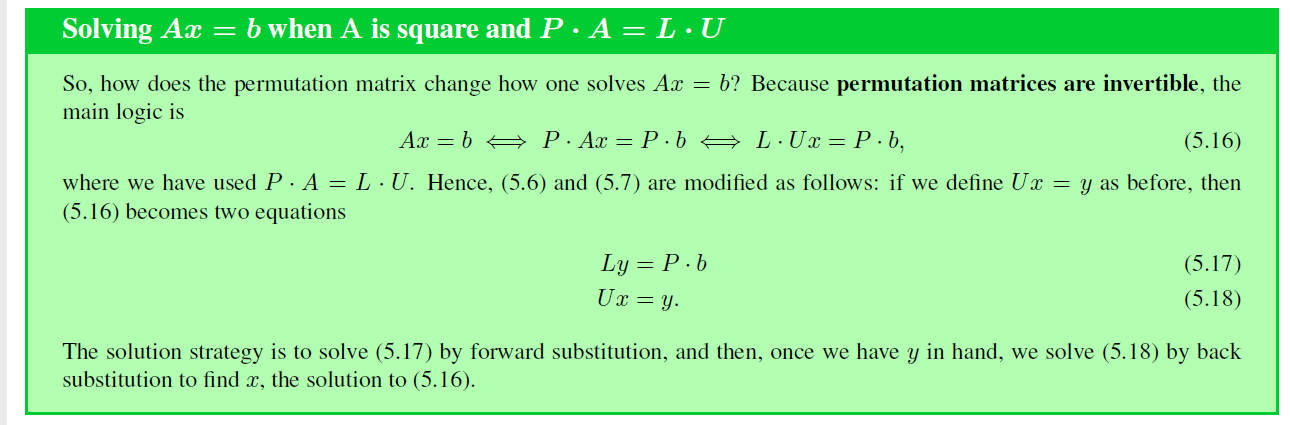


### Make sure your solution provides x and y that satisfy L * y = P * b and  U * x = y



In [ ]:
# Solve for y and x; see the above big green box
F = lu(A); # this does LU with permutations

# Be sure that you define x and y and the autograder will check their values
# y = ??
# x = ??

[x y]

In [ ]:
# If you are clever, you will check your answers yourself here

# Insert the appropriate multiplications and see if you are correct!
# For example L*y - P*b should be very small numbers


# If you find yourself struggling with Julia, reach out to us via Piazza. We have excellent IAs who have created a Julia tutoring session